<a href="https://colab.research.google.com/github/SLCFLAB/IBK2023/blob/main/01_Matrix_Computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1장 Matrix Computation

# 1절 벡터, 행렬

#### 코드 출처
[1] https://github.com/rickiepark/machine-learning-with-python-cookbook
[2] https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html
https://colab.research.google.com/github/SLCFLAB/Math4DS/blob/main

## 1.1 벡터 만들기

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

In [ ]:
np.__version__

'1.18.5'

In [ ]:
# 하나의 행으로 벡터를 만듭니다.
vector_row = np.array([1, 2, 3])

In [ ]:
vector_row

array([1, 2, 3])

In [ ]:
# 하나의 열로 벡터를 만듭니다.
vector_column = np.array([[1],
                          [2],
                          [3]])

In [ ]:
vector_column

array([[1],
       [2],
       [3]])

### 불임

In [ ]:
# 넘파이 배열의 클래스를 출력합니다.
print(type(vector_row))

<class 'numpy.ndarray'>


In [ ]:
# ndarray를 사용하는 것은 권장되지 않습니다.
bad_way = np.ndarray((3,))

In [ ]:
new_row = np.asarray([1, 2, 3])
# asarray()는 새로운 배열을 만들지 않습니다.
new_row = np.asarray(vector_row)
new_row is vector_row

True

In [ ]:
# array()는 배열이 입력되면 새로운 배열을 만듭니다.
new_row = np.array(vector_row)
new_row is vector_row

False

In [ ]:
# copy() 메서드를 사용하면 의도가 분명해집니다.
new_row = vector_row.copy()
new_row is vector_row

False

## 1.2 행렬 만들기

In [ ]:
# scipy.linalg operations can be applied equally to numpy.matrix or to 2D numpy.ndarray objects.
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [ ]:
linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [ ]:
b = np.array([[5,6]]) #2D array
b

array([[5, 6]])

In [ ]:
b.T

array([[5],
       [6]])

In [ ]:
A*b #not matrix multiplication!

array([[ 5, 12],
       [15, 24]])

In [ ]:
A.dot(b.T) #matrix multiplication

array([[17],
       [39]])

In [ ]:
b = np.array([5,6]) #1D array
b

array([5, 6])

In [ ]:
b.T  #not matrix transpose!

array([5, 6])

In [ ]:
A.dot(b)  #does not matter for multiplication

array([17, 39])

### 붙임

In [ ]:
# 임의의 값이 채워진 배열을 만듭니다.
empty_matrix = np.empty((3, 2))
empty_matrix

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
zero_matrix = np.zeros((3, 2))
zero_matrix

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
one_matrix = np.ones((3, 2))
one_matrix

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
# 0 행렬을 만든 후 7을 더합니다.
seven_matrix = np.zeros((3, 2)) + 7
# full() 함수를 사용하는 것이 효율적입니다.
seven_matrix = np.full((3, 2), 7)
seven_matrix

array([[7, 7],
       [7, 7],
       [7, 7]])

## 1.3 희소 행렬 만들기

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np
from scipy import sparse

# 행렬을 만듭니다.
matrix = np.array([[0, 0],
                   [0, 1],
                   [3, 0]])

# CSR (compressed sparse row) 행렬을 만듭니다.
matrix_sparse = sparse.csr_matrix(matrix)

In [ ]:
# 희소 행렬을 출력합니다.
print(matrix_sparse)

  (1, 1)	1
  (2, 0)	3


In [ ]:
# 큰 행렬을 만듭니다.
matrix_large = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                         [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# CSR 행렬을 만듭니다.
matrix_large_sparse = sparse.csr_matrix(matrix_large)

# 원래 희소 행렬을 출력합니다.
print(matrix_sparse)

  (1, 1)	1
  (2, 0)	3


In [ ]:
# 큰 희소 행렬을 출력합니다.
print(matrix_large_sparse)

  (1, 1)	1
  (2, 0)	3


### 붙임

In [ ]:
# (data, (row_index, col_index))로 구성된 튜플을 전달합니다.
# shape 매개변수에서 0을 포함한 행렬의 전체 크기를 지정합니다.
matrix_sparse_2 = sparse.csr_matrix(([1, 3], ([1, 2], [1, 0])), shape=(3, 10))

print(matrix_sparse_2)

  (1, 1)	1
  (2, 0)	3


In [ ]:
print(matrix_sparse_2.toarray())

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0]]


In [ ]:
matrix_sparse_2.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

## 1.4 원소 선택

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행 벡터를 만듭니다.
vector = np.array([1, 2, 3, 4, 5, 6])

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# vector의 세 번째 원소를 선택합니다.
vector[2]

3

In [ ]:
# matrix의 두 번째 행, 두 번째 열의 원소를 선택합니다.
matrix[1,1]

5

In [ ]:
# 벡터에 있는 모든 원소를 선택합니다.
vector[:]

array([1, 2, 3, 4, 5, 6])

In [ ]:
# 세 번째 원소를 포함하여 그 이전의 모든 원소를 선택합니다.
vector[:3]

array([1, 2, 3])

In [ ]:
# 세 번째 이후의 모든 원소를 선택합니다.
vector[3:]

array([4, 5, 6])

In [ ]:
# 마지막 원소를 선택합니다.
vector[-1]

6

In [ ]:
# 행렬에서 첫 번째 두 개의 행과 모든 열을 선택합니다.
matrix[:2,:]

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# 모든 행과 두 번째 열을 선택합니다.
matrix[:,1:2]

array([[2],
       [5],
       [8]])

### 붙임

In [ ]:
# 첫 번째 행과 세 번째 행을 선택합니다.
matrix[[0,2]]

array([[1, 2, 3],
       [7, 8, 9]])

In [ ]:
# (0, 1), (2, 0) 위치의 원소를 선택합니다.
matrix[[0,2], [1,0]]

array([2, 7])

In [ ]:
# matrix의 각 원소에 비교 연산자가 적용됩니다.
mask = matrix > 5

mask

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [ ]:
# 불리언 마스크 배열을 사용하여 원소를 선택합니다.
matrix[mask]

array([6, 7, 8, 9])

## 1.5 행렬 정보 확인

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

# 행렬의 크기를 확인합니다.
matrix.shape

(3, 4)

In [ ]:
# 행렬의 원소 개수를 확인합니다(행 * 열).
matrix.size

12

In [ ]:
# 차원 수를 확인합니다.
matrix.ndim

2

### 붙임

In [ ]:
# 원소의 데이터 타입을 확인합니다.
print(matrix.dtype)

int64


In [ ]:
# 원소 하나가 차지하는 바이트 크기입니다.
print(matrix.itemsize)

8


In [ ]:
# 배열 전체가 차지하는 바이트 크기입니다.
print(matrix.nbytes)

96


## 1.6 배열 크기 바꾸기

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 4x3 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])

# 2x6 행렬로 크기를 바꿉니다.
matrix.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [ ]:
matrix.size

12

In [ ]:
matrix.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [ ]:
matrix.reshape(12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### 붙임

In [ ]:
matrix.reshape(-1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
matrix.ravel()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## 1.10 벡터나 행렬을 전치하기

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 행렬을 전치합니다.
matrix.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [ ]:
# 벡터를 전치합니다. -1D array
np.array([1, 2, 3, 4, 5, 6]).T

array([1, 2, 3, 4, 5, 6])

In [ ]:
# 행 벡터를 전치합니다.- 2D array
np.array([[1, 2, 3, 4, 5, 6]]).T

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

### 붙임

In [ ]:
matrix.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [ ]:
# 2x3x2 행렬을 만듭니다.
matrix = np.array([[[ 1,  2],
                    [ 3,  4],
                    [ 5,  6]],

                   [[ 7,  8],
                    [ 9, 10],
                    [11, 12]]])

# 두 번째와 세 번째 차원을 바꾸어 2x2x3 행렬로 만듭니다.
matrix.transpose((0, 2, 1))

array([[[ 1,  3,  5],
        [ 2,  4,  6]],

       [[ 7,  9, 11],
        [ 8, 10, 12]]])

## 1.11 행렬 펼치기

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 행렬을 펼칩니다.
matrix.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
matrix.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

### 붙임

In [ ]:
vector_reshaped = matrix.reshape(-1)
vector_flattened = matrix.flatten()

# (0, 0) 위치의 원소를 바꿉니다.
matrix[0][0] = -1

# 배열의 뷰는 원본 배열의 변경 사항을 반영합니다.
vector_reshaped

array([-1,  2,  3,  4,  5,  6,  7,  8,  9])

In [ ]:
# 복사된 배열에는 영향이 미치지 않습니다.
vector_flattened

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# 2절 Numerical Linear Algebra

## 2.1 행렬의 랭크 구하기

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 1, 1],
                   [1, 1, 10],
                   [1, 1, 15]])

# 행렬의 랭크를 반환합니다.
np.linalg.matrix_rank(matrix)

2

### 붙임

넘파이 0.18 버전에서 `rank()` 함수가 삭제되었습니다. 대신 `ndim()` 함수를 사용하세요.

In [ ]:
# 2D 배열이므로 2가 반환됩니다.
np.ndim(matrix)

2

In [ ]:
# svd 함수로 특잇값만 계산합니다.
s = np.linalg.svd(matrix, compute_uv=False)
# 오차를 고려하여 0에 가까운 아주 작은 값을 지정합니다.
np.sum(s > 1e-10)

2

## 2.2 행렬식(determinant)과 norm 계산하기

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np
from scipy import linalg

# 행렬을 만듭니다.
A = np.array([[1, 3, 5],
              [2, 5, 1],
              [2, 3, 8]])

# 행렬의 행렬식을 반환합니다.
linalg.det(A)

-25.000000000000004

In [ ]:
linalg.norm(A)

11.916375287812984

In [ ]:
linalg.norm(A,'fro') # frobenius norm is the default

11.916375287812984

In [ ]:
linalg.norm(A,1) # L1 norm (max column sum)

14.0

In [ ]:
linalg.norm(A,-1) # min column sum

5.0

In [ ]:
linalg.norm(A,np.inf) # L inf norm (max row sum)

13.0

## 2.3 행렬의 대각 원소 추출하기

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])

# 대각 원소를 반환합니다.
matrix.diagonal()

array([1, 4, 9])

### 붙임

In [ ]:
# 반환된 배열을 변경하려면 복사해야 합니다.
a = matrix.diagonal().copy()

In [ ]:
a = np.diag(matrix)
print(a)

[1 4 9]


In [ ]:
# 1차원 배열이 주어지면 2차원 대각행렬을 만듭니다.
np.diag(a)

array([[1, 0, 0],
       [0, 4, 0],
       [0, 0, 9]])

## 2.4 행렬의 대각합(trace) 계산

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])

# 대각합을 반환합니다.
matrix.trace()

14

In [ ]:
# 대각 원소를 사용하여 합을 구합니다.
sum(matrix.diagonal())

14

### 붙임

In [ ]:
# 주 대각선 하나 위의 대각 원소의 합을 반환합니다.
matrix.trace(offset=1)

8

In [ ]:
# 주 대각선 하나 아래의 대각 원소의 합을 반환합니다.
matrix.trace(offset=-1)

10

## 2.5 점곱 계산

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 두 벡터를 만듭니다.
vector_a = np.array([1,2,3])
vector_b = np.array([4,5,6])

# 점곱을 계산합니다.
np.dot(vector_a, vector_b)

32

### 붙임

In [ ]:
scalar_a = np.array(1)
scalar_b = np.array(2)

In [ ]:
np.dot(scalar_a, scalar_b)

2

In [ ]:
# 스칼라 배열에 적용되지 않습니다.
scalar_a @ scalar_b

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

## 2.6 행렬 덧셈과 뺄셈

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix_a = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 2]])

# 행렬을 만듭니다.
matrix_b = np.array([[1, 3, 1],
                     [1, 3, 1],
                     [1, 3, 8]])

# 두 행렬을 더합니다.
np.add(matrix_a, matrix_b)

array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])

In [ ]:
# 두 행렬을 뺍니다.
np.subtract(matrix_a, matrix_b)

array([[ 0, -2,  0],
       [ 0, -2,  0],
       [ 0, -2, -6]])

In [ ]:
# 두 행렬을 더합니다.
matrix_a + matrix_b

array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])

## 2.7 행렬 곱셈

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix_a = np.array([[1, 1],
                     [1, 2]])

# 행렬을 만듭니다.
matrix_b = np.array([[1, 3],
                     [1, 2]])

# 두 행렬을 곱합니다.
np.dot(matrix_a, matrix_b)

array([[2, 5],
       [3, 7]])

In [ ]:
# 두 행렬을 곱합니다.
matrix_a @ matrix_b

array([[2, 5],
       [3, 7]])

In [ ]:
# 두 행렬의 원소별 곱셈을 수행합니다.
matrix_a * matrix_b

array([[1, 3],
       [1, 4]])

### 붙임

In [ ]:
a = np.random.rand(2, 1, 4, 5)
b = np.random.rand(1, 3, 5, 6)

np.dot(a, b).shape

(2, 1, 4, 1, 3, 6)

In [ ]:
np.matmul(a, b).shape

(2, 3, 4, 6)

## 2.8 역행렬 구하기, 연립방정식 풀기

In [ ]:
import numpy as np
from scipy import linalg
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [ ]:
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [ ]:
A.dot(linalg.inv(A)) #double check

array([[ 1.00000000e+00, -1.11022302e-16, -5.55111512e-17],
       [ 3.05311332e-16,  1.00000000e+00,  1.87350135e-16],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

In [ ]:
# 행렬과 역행렬을 곱합니다.
A @ np.linalg.inv(A)

array([[ 1.00000000e+00,  1.11022302e-16,  4.85722573e-17],
       [-1.38777878e-16,  1.00000000e+00,  7.63278329e-17],
       [-2.22044605e-16,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
b = np.array([[10], [8], [3]])
b

array([[10],
       [ 8],
       [ 3]])

In [ ]:
linalg.inv(A).dot(b)  # slow

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [ ]:
A.dot(linalg.inv(A).dot(b)) - b  # check

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-8.88178420e-16]])

In [ ]:
np.linalg.solve(A, b)  # fast

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [ ]:
A.dot(np.linalg.solve(A, b)) - b  # check

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-1.77635684e-15]])

###  LU factorization

In [ ]:
import numpy as np
from scipy.linalg import lu
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
P, L, U = lu(A)
np.allclose(A - P @ L @ U, np.zeros((3, 3)))

True

In [ ]:
b = np.array([[10], [8], [3]])
y=np.linalg.solve(L, P.T@ b)
y

array([[ 8.  ],
       [-5.  ],
       [ 4.75]])

In [ ]:
x=np.linalg.solve(U, y)
x

array([[-9.28],
       [ 5.16],
       [ 0.76]])

## 2.9 최소자승법 & QR

In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)

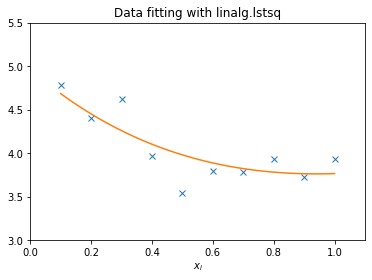

In [ ]:
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

In [ ]:
q, r = linalg.qr(A)
np.allclose(A, np.dot(q, r))

True

In [ ]:
A.shape, q.shape, r.shape

((10, 2), (10, 10), (10, 2))

In [ ]:
# either both Q and R (‘full’, default), only R (‘r’) or
# both Q and R but computed in economy-size (‘economic’, see Notes)
r2 = linalg.qr(A, mode='r')
np.allclose(r, r2)

True

In [ ]:
q3, r3 = linalg.qr(A, mode='economic')
q3.shape, r3.shape

((10, 2), (2, 2))

In [ ]:
q3.T@ zi

array([-12.56956849,   2.61279847])

In [ ]:
x=np.linalg.solve(r3, q3.T@ zi)
x, c

(array([4.96165066, 1.93854873]), array([4.96165066, 1.93854873]))

## 2.10 Eigenvalues and eigenvectors & SVD

In [ ]:
import numpy as np
from scipy import linalg
A = np.array([[1, 5, 2], [2, 4, 1], [3, 6, 2]])
la, v = linalg.eig(A)
l1, l2, l3 = la
print(l1,l2,l3)

(7.957916204910748+0j) (-1.2576647056775332+0j) (0.2997485007667829+0j)


In [ ]:
print(v[:, 0])
print(v[:, 1])
print(v[:, 2])

[-0.5297175  -0.44941741 -0.71932146]
[-0.90730751  0.28662547  0.30763439]
[ 0.28380519 -0.39012063  0.87593408]


In [ ]:
print(np.sum(abs(v**2), axis=0))  # eigenvectors are unitary

[1. 1. 1.]


In [ ]:
v1 = np.array(v[:, 0]).T
print(linalg.norm(A.dot(v1) - l1*v1))  # check the computation

3.233018248352212e-15


In [ ]:
import numpy as np
from scipy import linalg
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
M,N = A.shape
U,s,Vh = linalg.svd(A)
Sig = linalg.diagsvd(s,M,N)
U.shape,  s.shape, Vh.shape

((2, 2), (2,), (3, 3))

In [ ]:
U

array([[-0.3863177 ,  0.92236578],
       [-0.92236578, -0.3863177 ]])

In [ ]:
Sig

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [ ]:
Vh

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [-0.80596391, -0.11238241,  0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [ ]:
U.dot(Sig.dot(Vh)) #check computation

array([[1., 2., 3.],
       [4., 5., 6.]])

### Moore-Penrose pseudo-inverse

In [ ]:
M = np.array([[1, 4, 7],
                   [2, 5, 8]])

# 유사 역행렬을 계산합니다.
pM=np.linalg.pinv(M)
pM

array([[-1.16666667,  1.        ],
       [-0.33333333,  0.33333333],
       [ 0.5       , -0.33333333]])

In [ ]:
np.allclose(M, np.dot(M, np.dot(pM, M)))

True

In [ ]:
np.allclose(pM, np.dot(pM, np.dot(M, pM)))

True